In [1]:
!pip install plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
from scipy import stats
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score ,classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from gensim.models import Word2Vec
import tensorflow as tf

from tensorflow.keras.layers import Dense , SimpleRNN, Flatten ,Dropout, Input, Activation,GRU,LSTM,Conv1D

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from nltk.stem import ARLSTem
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from keras.utils import to_categorical



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))

In [3]:
def get_accuracy_NN(name, trained_model , x_train, y_train, x_test, y_test,y_train_enc,y_test_enc):
  loss,acc=model.evaluate(x_test,y_test_enc)
  print("test loss :", loss)
  print('test accuracy:',acc*100)
  print("____________________________")
  loss,acc=model.evaluate(x_train,y_train_enc)
  print("trainig loss :", loss)
  print('trainig accuracy:',acc*100)
  print("____________________________")

  pred=model.predict(x_test)
  pred_list=[]
  for i in pred:
    pred_list.append(np.argmax(i))
  cf1 = confusion_matrix(y_test,pred_list)
  sns.heatmap(cf1,annot=True,fmt = '.0f')
  plt.xlabel('prediction')
  plt.ylabel('Actual')
  plt.title(name+ ' Confusion Matrix')
  plt.show()
  print("true")
  print(classification_report(y_test,pred_list  ))
  

In [4]:
df= pd.read_excel('/content/original_dataset.xlsx')

In [5]:
df=pd.DataFrame(df)

In [6]:
df.head()

,Unnamed: 0,review_description,rating,company
0,0,سيئ جدا بعد الإصدار الجديد,-1,alahli_bank
1,1,ابلكيشن زباله بجد,-1,alahli_bank
2,2,سيئ التطبيق لايعمل,-1,alahli_bank
3,3,للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط ا...,-1,alahli_bank
4,4,التحديث بطيئ جدا جدا عند الفتح,-1,alahli_bank


In [7]:
print(df.shape)
df=df.dropna()
df=df.drop_duplicates()
print(df.shape)

(67127, 4)
(67125, 4)


# **data visualization**

<AxesSubplot:>

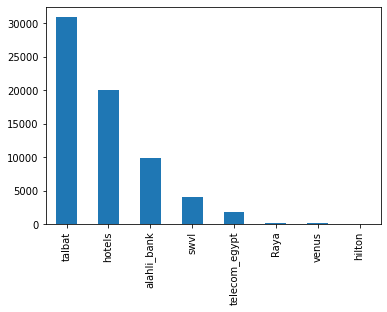

In [8]:
df.company.value_counts().plot(kind='bar')

In [9]:
fig = px.sunburst(df, path=['rating'],title= ' rating')
fig.update_traces(textinfo='label + percent parent')

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all_trees = df_all_trees.append(df_tree, ignore_index=True)


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='rating', ylabel='count'>

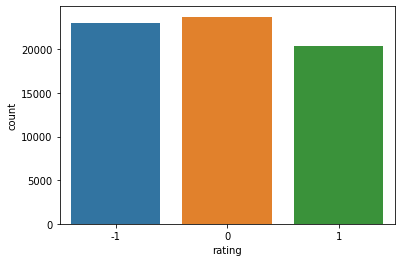

In [10]:
sns.countplot(df.rating)

In [11]:
fig = px.sunburst(df, path=['company', 'rating'],title= 'Relation between company and rating')
fig.update_traces(textinfo='label + percent parent')

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.9/dist-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [12]:
emojis = {
    "🙂":"يبتسم",
    "😂":"يضحك",
    "💔":"قلب حزين",
    "🙂":"يبتسم",
    "❤️":"حب",
    "❤":"حب",
    "😍":"حب",
    "😭":"يبكي",
    "😢":"حزن",
    "😔":"حزن",
    "♥":"حب",
    "💜":"حب",
    "😅":"يضحك",
    "🙁":"حزين",
    "💕":"حب",
    "💙":"حب",
    "😞":"حزين",
    "😊":"سعادة",
    "👏":"يصفق",
    "👌":"احسنت",
    "😴":"ينام",
    "😀":"يضحك",
    "😌":"حزين",
    "🌹":"وردة",
    "🙈":"حب",
    "😄":"يضحك",
    "😐":"محايد",
    "✌":"منتصر",
    "✨":"نجمه",
    "🤔":"تفكير",
    "😏":"يستهزء",
    "😒":"يستهزء",
    "🙄":"ملل",
    "😕":"عصبية",
    "😃":"يضحك",
    "🌸":"وردة",
    "😓":"حزن",
    "💞":"حب",
    "💗":"حب",
    "😑":"منزعج",
    "💭":"تفكير",
    "😎":"ثقة",
    "💛":"حب",
    "😩":"حزين",
    "💪":"عضلات",
    "👍":"موافق",
    "🙏🏻":"رجاء طلب",
    "😳":"مصدوم",
    "👏🏼":"تصفيق",
    "🎶":"موسيقي",
    "🌚":"صمت",
    "💚":"حب",
    "🙏":"رجاء طلب",
    "💘":"حب",
    "🍃":"سلام",
    "☺":"يضحك",
    "🐸":"ضفدع",
    "😶":"مصدوم",
    "✌️":"مرح",
    "✋🏻":"توقف",
    "😉":"غمزة",
    "🌷":"حب",
    "🙃":"مبتسم",
    "😫":"حزين",
    "😨":"مصدوم",
    "🎼 ":"موسيقي",
    "🍁":"مرح",
    "🍂":"مرح",
    "💟":"حب",
    "😪":"حزن",
    "😆":"يضحك",
    "😣":"استياء",
    "☺️":"حب",
    "😱":"كارثة",
    "😁":"يضحك",
    "😖":"استياء",
    "🏃🏼":"يجري",
    "😡":"غضب",
    "🚶":"يسير",
    "🤕":"مرض",
    "‼️":"تعجب",
    "🕊":"طائر",
    "👌🏻":"احسنت",
    "❣":"حب",
    "🙊":"مصدوم",
    "💃":"سعادة مرح",
    "💃🏼":"سعادة مرح",
    "😜":"مرح",
    "👊":"ضربة",
    "😟":"استياء",
    "💖":"حب",
    "😥":"حزن",
    "🎻":"موسيقي",
    "✒":"يكتب",
    "🚶🏻":"يسير",
    "💎":"الماظ",
    "😷":"وباء مرض",
    "☝":"واحد",
    "🚬":"تدخين",
    "💐" : "ورد",
    "🌞" : "شمس",
    "👆" : "الاول",
    "⚠️" :"تحذير",
    "🤗" : "احتواء",
    "✖️": "غلط",
    "📍"  : "مكان",
    "👸" : "ملكه",
    "👑" : "تاج",
    "✔️" : "صح",
    "💌": "قلب",
    "😲" : "مندهش",
    "💦": "ماء",
    "🚫" : "خطا",
    "👏🏻" : "برافو",
    "🏊" :"يسبح",
    "👍🏻": "تمام",
    "⭕️" :"دائره كبيره",
    "🎷" : "ساكسفون",
    "👋": "تلويح باليد",
    "✌🏼": "علامه النصر",
    "🌝":"مبتسم",
    "➿"  : "عقده مزدوجه",
    "💪🏼" : "قوي",
    "📩":  "تواصل معي",
    "☕️": "قهوه",
    "😧" : "قلق و صدمة",
    "🗨": "رسالة",   
    "❗️" :"تعجب",
    "🙆🏻": "اشاره موافقه",
    "👯" :"اخوات",
    "©" :  "رمز",
    "👵🏽" :"سيده عجوزه",
    "🐣": "كتكوت",  
    "🙌": "تشجيع",
    "🙇": "شخص ينحني",
    "👐🏽":"ايدي مفتوحه",    
    "👌🏽": "بالظبط",
    "⁉️" : "استنكار",
    "⚽️": "كوره",
    "🕶" :"حب",
    "🎈" :"بالون",    
    "🎀":    "ورده",
    "💵":  "فلوس",   
    "😋":  "جائع",
    "😛":  "يغيظ",
    "😠":  "غاضب",
    "✍🏻":  "يكتب",
    "🌾":  "ارز",
    "👣":  "اثر قدمين",
    "❌":"رفض",
    "🍟":"طعام",
    "👬":"صداقة",
    "🐰":"ارنب",
    "☂":"مطر",
    "⚜":"مملكة فرنسا",
    "🐑":"خروف",
    "🗣":"صوت مرتفع",
    "👌🏼":"احسنت",
    "☘":"مرح",
    "😮":"صدمة",
    "😦":"قلق",
    "⭕":"الحق",
    "✏️":"قلم",
    "ℹ":"معلومات",
    "🙍🏻":"رفض",
    "⚪️":"نضارة نقاء",
    "🐤":"حزن",
    "💫":"مرح",
    "💝":"حب",
    "🍔":"طعام",
    "❤︎":"حب",
    "✈️":"سفر",
    "🏃🏻‍♀️":"يسير",
    "🍳":"ذكر",
    "🎤":"مايك غناء",
    "🎾":"كره",
    "🐔":"دجاجة",
    "🙋":"سؤال",
    "📮":"بحر",
    "💉":"دواء",
    "🙏🏼":"رجاء طلب",
    "💂🏿 ":"حارس",
    "🎬":"سينما",
    "♦️":"مرح",
    "💡":"قكرة",
    "‼":"تعجب",
    "👼":"طفل",
    "🔑":"مفتاح",
    "♥️":"حب",
    "🕋":"كعبة",
    "🐓":"دجاجة",
    "💩":"معترض",
    "👽":"فضائي",
    "☔️":"مطر",
    "🍷":"عصير",
    "🌟":"نجمة",
    "☁️":"سحب",
    "👃":"معترض",
    "🌺":"مرح",
    "🔪":"سكينة",
    "♨":"سخونية",
    "👊🏼":"ضرب",
    "✏":"قلم",
    "🚶🏾‍♀️":"يسير",
    "👊":"ضربة",
    "◾️":"وقف",
    "😚":"حب",
    "🔸":"مرح",
    "👎🏻":"لا يعجبني",
    "👊🏽":"ضربة",
    "😙":"حب",
    "🎥":"تصوير",
    "👉":"جذب انتباه",
    "👏🏽":"يصفق",
    "💪🏻":"عضلات",
    "🏴":"اسود",
    "🔥":"حريق",  
    "😬":"عدم الراحة",   
    "👊🏿":"يضرب",    
    "🌿":"ورقه شجره",     
    "✋🏼":"كف ايد",    
    "👐":"ايدي مفتوحه",      
    "☠️":"وجه مرعب",     
    "🎉":"يهنئ",      
    "🔕" :"صامت",
    "😿":"وجه حزين",      
    "☹️":"وجه يائس",     
    "😘" :"حب",     
    "😰" :"خوف و حزن",
    "🌼":"ورده",      
    "💋":  "بوسه",
    "👇":"لاسفل",     
    "❣️":"حب",     
    "🎧":"سماعات",
    "📝":"يكتب",      
    "😇":"دايخ",      
    "😈":"رعب",      
    "🏃":"يجري",      
    "✌🏻":"علامه النصر",    
    "🔫":"يضرب",      
    "❗️":"تعجب",
    "👎":"غير موافق",      
    "🔐":"قفل",      
    "👈":"لليمين",
    "™":"رمز",    
    "🚶🏽":"يتمشي",    
    "😯":"متفاجأ",  
    "✊":"يد مغلقه",    
    "😻":"اعجاب",    
    "🙉" :"قرد",    
    "👧":"طفله صغيره",     
    "🔴":"دائره حمراء",      
    "💪🏽":"قوه",     
    "💤":"ينام",     
    "👀":"ينظر",     
    "✍🏻":"يكتب",  
    "❄️":"تلج",
    "💀":"رعب",   
    "😤":"وجه عابس",      
    "🖋":"قلم",      
    "🎩":"كاب",      
    "☕️":"قهوه",     
    "😹":"ضحك",     
    "💓":"حب",      
    "☄️ ":"نار",     
    "👻":"رعب",
    "❎":"خطء",
    "🤮":"حزن",
    '🏻':"احمر"
    }

emoticons_to_emoji = {
    ":)" : "🙂",
    ":(" : "🙁",
    "xD" : "😆",
    ":=(": "😭",
    ":'(": "😢",
    ":'‑(": "😢",
    "XD" : "😂",
    ":D" : "🙂",
    "♬" : "موسيقي",
    "♡" : "❤",
    "☻"  : "🙂",
    }

# **data cleaning**

In [13]:
def del_digits_and_pun(value,pun):
    new_value= re.sub('[1-9]','',value)
    for i in pun:
        new_value=new_value.replace(i,' ')
    return new_value

In [14]:
def tokens_review(x,stop_words):
    x=str(x)
    words=word_tokenize(x)
    new_words=[]
    for i in words:
        text = re.sub(r'[^ء-ي ]',' ',i)
        
        if text not in stop_words:
            new_words.append(text)
    return new_words

In [15]:
def remove_diacritics(text):
        arabic_diacritics = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
        text = re.sub(arabic_diacritics, '', str(text))
        return text 

In [16]:
def hendle_emojis(text,emojis):
  li=[]
  for i in word_tokenize(text):
    for x in i :
      if x not in emojis.keys():
        li.append(i)
        break
      else:
        li.append(emojis[x])
  return " ".join(li)
        

delete english punctuations and arabic punctuations from our reviews

In [17]:
hendle_emojis("😂😂😂", emojis)

'يضحك يضحك يضحك'

In [18]:
arabic_punctuations = """
`÷×؛،.<>_()*&^%][ـ،/:؟.,'{}~¦+|!”…“–#.ـ
"""

english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations
punctuations_list
list_pun=[i for i in punctuations_list]


df.review_description=df.review_description.apply(del_digits_and_pun,args=[list_pun])



# ** staming  reviwe**

In [19]:
def preprossing (review):
  words=word_tokenize(review)
  new_words=[]
  stop_words=stopwords.words('arabic')

  for i in words:
    stemmer = ARLSTem()
    word = stemmer.stem(i)
    if i in stop_words:
      continue 
    new_words.append(word)

  return " ".join(new_words)




In [20]:
import nltk

df['clean']=df.review_description.apply(preprossing)
df['clean']=df.clean.apply(hendle_emojis,args=[emojis])



In [21]:
df.head()

,Unnamed: 0,review_description,rating,company,clean
0,0,سيئ جدا بعد الإصدار الجديد,-1,alahli_bank,سيئ جدا صدر جديد
1,1,ابلكيشن زباله بجد,-1,alahli_bank,بلكيش زبال بجد
2,2,سيئ التطبيق لايعمل,-1,alahli_bank,سيئ تطبيق لايعمل
3,3,للأسف التطبيق للأسوأ كان جدا رائع وسهل وبسيط ا...,-1,alahli_bank,اسف تطبيق اسوا جدا رائع سهل بسيط معقد فتح معا ...
4,4,التحديث بطيئ جدا جدا عند الفتح,-1,alahli_bank,تحديث بطيئ جدا جدا فتح


In [22]:
x=df['clean'].tolist()


['سيئ جدا صدر جديد',
 'بلكيش زبال بجد',
 'سيئ تطبيق لايعمل',
 'اسف تطبيق اسوا جدا رائع سهل بسيط معقد فتح معا بسهول تجد خدم متاح',
 'تحديث بطيئ جدا جدا فتح',
 'مرررر زق اخر حديث فتحلي ابد رفض اي كلم مرور كتب او رقم بطاق اهلي خربت غلب ناس كان معتمد اسف',
 'تطبيق شتغل عمل سجيل دخول حسابي فتح شوفو حل انا معطل',
 'اذا قمت بفتح تطبيق طلب حديث اذا ضغط تحديث قبل تحديث لاهو للي فتح لاهو للي حدث وش مشكل',
 'اسف سيئ جدا امس احول ستخدم مافي اتواصل خدم عملاء قال حذف نزل جديد يمك يكو حديث نفس مشكل ماانحل',
 'صراح شي موسف']

In [23]:
tfidfconverter= TfidfVectorizer(max_features=1000,ngram_range=(1,3))
X_Vec = tfidfconverter.fit_transform(x)
X_Vec = pd.DataFrame.sparse.from_spmatrix(X_Vec)
Y=df["rating"]


# **split dataset**

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_Vec,Y,random_state=42,test_size=0.02,shuffle=True)


Testing accuracy   : 86.15040953090097 %
MSE [TEST]          : 0.33730454206999255
Training accuracy  : 85.6860539357271 %
MSE [TRAIN]         : 0.3402906570186373
precision :  0.8615040953090097
recall    :  0.8615040953090097
f1_score  :  0.8615040953090097


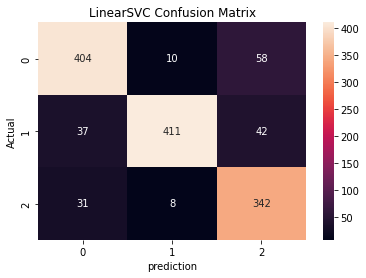

              precision    recall  f1-score   support

          -1       0.86      0.86      0.86     22563
           0       0.95      0.82      0.88     23261
           1       0.78      0.89      0.83     19958

    accuracy                           0.86     65782
   macro avg       0.86      0.86      0.86     65782
weighted avg       0.86      0.86      0.86     65782

              precision    recall  f1-score   support

          -1       0.86      0.86      0.86       472
           0       0.96      0.84      0.89       490
           1       0.77      0.90      0.83       381

    accuracy                           0.86      1343
   macro avg       0.86      0.86      0.86      1343
weighted avg       0.87      0.86      0.86      1343



In [25]:

from sklearn.svm import LinearSVC
trained_clf_svc = LinearSVC().fit(x_train, y_train)
get_accuracy('LinearSVC',trained_clf_svc,x_train, y_train, x_test, y_test)


# **features extraction  word2vec**

In [26]:
from gensim.models import Word2Vec
sents=[]
dim_num=100
for i in df.clean:
  sents.append(word_tokenize(i))
model=Word2Vec(sentences=sents, window=5, min_count=1, workers=4,size=dim_num)


In [27]:
X=np.zeros((dim_num,), dtype=float)

for i in (df.clean):
  counter=0
  sum=np.zeros((100,), dtype=float)
  for x in word_tokenize(i) :
    sum+=model.wv[x]
    counter+=1
  if counter==0 :
    X=np.vstack((X,sum))
  else:
    X=np.vstack((X,sum/counter))
X= np.delete(X, (0), axis=0)
y=df.rating 
X.shape

  

(67125, 100)

**# get X and y**

In [28]:
from sklearn.model_selection import train_test_split

def encod(x):
  if x==-1:
    return 0
  if x== 0:
    return 1
  return 2
y=df.rating
y=y.apply(encod)
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=.02,shuffle=True)
y_train_enc = tf.keras.utils.to_categorical(y_train)
y_test_enc=tf.keras.utils.to_categorical(y_test)


# **LinearSVC**

In [29]:

from sklearn.svm import LinearSVC
trained_clf_svc = LinearSVC().fit(x_train, y_train)


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Testing accuracy   : 81.3849590469099 %
MSE [TEST]          : 0.3827252419955324
Training accuracy  : 81.399166945365 %
MSE [TRAIN]         : 0.37280715089234134
precision :  0.813849590469099
recall    :  0.813849590469099
f1_score  :  0.813849590469099


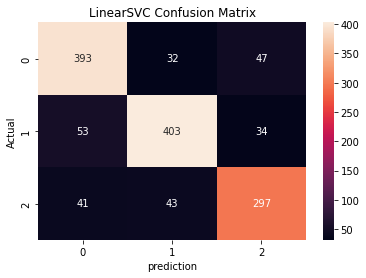

              precision    recall  f1-score   support

           0       0.82      0.84      0.83     22563
           1       0.84      0.81      0.82     23261
           2       0.79      0.79      0.79     19958

    accuracy                           0.81     65782
   macro avg       0.81      0.81      0.81     65782
weighted avg       0.81      0.81      0.81     65782

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       472
           1       0.84      0.82      0.83       490
           2       0.79      0.78      0.78       381

    accuracy                           0.81      1343
   macro avg       0.81      0.81      0.81      1343
weighted avg       0.81      0.81      0.81      1343



In [30]:
get_accuracy('LinearSVC',trained_clf_svc,x_train, y_train, x_test, y_test)

# **apply decision tree model**

Testing accuracy   : 78.40655249441548 %
MSE [TEST]          : 0.4973938942665674
Training accuracy  : 78.53668176704873 %
MSE [TRAIN]         : 0.48415980055334285
precision :  0.7840655249441548
recall    :  0.7840655249441548
f1_score  :  0.7840655249441548


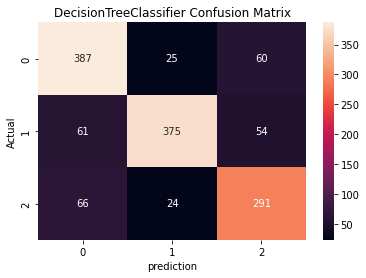

              precision    recall  f1-score   support

           0       0.76      0.83      0.80     22563
           1       0.88      0.75      0.81     23261
           2       0.72      0.78      0.75     19958

    accuracy                           0.79     65782
   macro avg       0.79      0.79      0.78     65782
weighted avg       0.79      0.79      0.79     65782

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       472
           1       0.88      0.77      0.82       490
           2       0.72      0.76      0.74       381

    accuracy                           0.78      1343
   macro avg       0.79      0.78      0.78      1343
weighted avg       0.79      0.78      0.79      1343



In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, min_samples_split= 2).fit(x_train,y_train)
get_accuracy('DecisionTreeClassifier',clf,x_train, y_train, x_test, y_test)


# **random forest model**

Testing accuracy   : 83.91660461653015 %
MSE [TEST]          : 0.3730454206999255
Training accuracy  : 84.78155118421454 %
MSE [TRAIN]         : 0.34482077163965824
precision :  0.8391660461653015
recall    :  0.8391660461653015
f1_score  :  0.8391660461653017


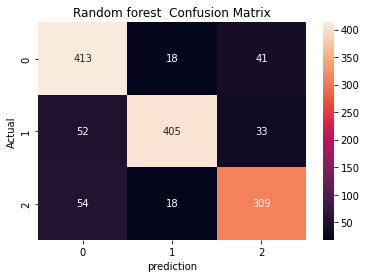

              precision    recall  f1-score   support

           0       0.81      0.89      0.85     22563
           1       0.92      0.82      0.87     23261
           2       0.81      0.83      0.82     19958

    accuracy                           0.85     65782
   macro avg       0.85      0.85      0.85     65782
weighted avg       0.85      0.85      0.85     65782

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       472
           1       0.92      0.83      0.87       490
           2       0.81      0.81      0.81       381

    accuracy                           0.84      1343
   macro avg       0.84      0.84      0.84      1343
weighted avg       0.84      0.84      0.84      1343



In [32]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(max_depth=9,min_samples_leaf=5,min_samples_split=3).fit(x_train,y_train)
get_accuracy('Random forest ',model,x_train, y_train, x_test, y_test)


# **model 1 neural network**

In [33]:

model=Sequential()
model.add(Dense( 64 ,input_shape=(100,),activation='relu' ))
model.add(Dense(32, activation='relu',kernel_regularizer='l1'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy' ,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 3)                 51        
                                                                 
Total params: 9,123
Trainable params: 9,123
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(x_train,y_train_enc,batch_size=256 ,epochs=150)


Epoch 1/150
257/257 [==============================] - 2s 3ms/step - loss: 1.6164 - accuracy: 0.7824
Epoch 2/150
257/257 [==============================] - 1s 3ms/step - loss: 0.6423 - accuracy: 0.8143
Epoch 3/150
257/257 [==============================] - 1s 3ms/step - loss: 0.5696 - accuracy: 0.8204
Epoch 4/150
257/257 [==============================] - 1s 3ms/step - loss: 0.5405 - accuracy: 0.8240
Epoch 5/150
257/257 [==============================] - 1s 3ms/step - loss: 0.5205 - accuracy: 0.8278
Epoch 6/150
257/257 [==============================] - 1s 3ms/step - loss: 0.5086 - accuracy: 0.8288
Epoch 7/150
257/257 [==============================] - 1s 3ms/step - loss: 0.4997 - accuracy: 0.8310
Epoch 8/150
257/257 [==============================] - 1s 2ms/step - loss: 0.4923 - accuracy: 0.8316
Epoch 9/150
257/257 [==============================] - 1s 2ms/step - loss: 0.4868 - accuracy: 0.8328
Epoch 10/150
257/257 [==============================] - 1s 3ms/step - loss: 0.4816 - accura

42/42 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8585
test loss : 0.4010699987411499
test accuracy: 85.85256934165955
____________________________
2056/2056 [==============================] - 4s 2ms/step - loss: 0.3925 - accuracy: 0.8585
trainig loss : 0.392451673746109
trainig accuracy: 85.8532726764679
____________________________
42/42 [==============================] - 0s 1ms/step


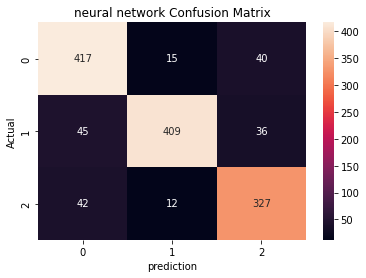

true
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       472
           1       0.94      0.83      0.88       490
           2       0.81      0.86      0.83       381

    accuracy                           0.86      1343
   macro avg       0.86      0.86      0.86      1343
weighted avg       0.86      0.86      0.86      1343



In [35]:
get_accuracy_NN("neural network",model,x_train,y_train,x_test,y_test,y_train_enc,y_test_enc)

# ***model 2 neural ntework***

In [36]:

model=Sequential()
model.add(Dense( 120,input_shape=(100,),activation='relu' ))

model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))


model.compile(optimizer = 'adam' ,loss = 'categorical_crossentropy' ,metrics=['accuracy'])



Epoch 1/50
257/257 [==============================] - 2s 4ms/step - loss: 0.5339 - accuracy: 0.7976
Epoch 2/50
257/257 [==============================] - 1s 5ms/step - loss: 0.4441 - accuracy: 0.8335
Epoch 3/50
257/257 [==============================] - 1s 5ms/step - loss: 0.4259 - accuracy: 0.8391
Epoch 4/50
257/257 [==============================] - 1s 4ms/step - loss: 0.4159 - accuracy: 0.8418
Epoch 5/50
257/257 [==============================] - 1s 4ms/step - loss: 0.4102 - accuracy: 0.8444
Epoch 6/50
257/257 [==============================] - 1s 5ms/step - loss: 0.4034 - accuracy: 0.8472
Epoch 7/50
257/257 [==============================] - 1s 5ms/step - loss: 0.3990 - accuracy: 0.8486
Epoch 8/50
257/257 [==============================] - 1s 3ms/step - loss: 0.3948 - accuracy: 0.8493
Epoch 9/50
257/257 [==============================] - 1s 3ms/step - loss: 0.3907 - accuracy: 0.8513
Epoch 10/50
257/257 [==============================] - 1s 3ms/step - loss: 0.3871 - accuracy: 0.8516

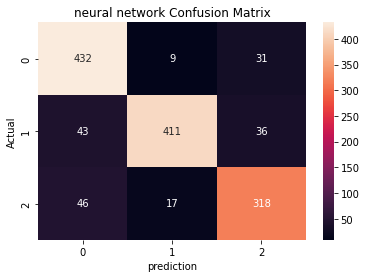

true
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       472
           1       0.94      0.84      0.89       490
           2       0.83      0.83      0.83       381

    accuracy                           0.86      1343
   macro avg       0.87      0.86      0.86      1343
weighted avg       0.87      0.86      0.86      1343



In [37]:
model.fit(x_train,y_train_enc,batch_size=256 ,epochs=50)
get_accuracy_NN("neural network",model,x_train,y_train,x_test,y_test,y_train_enc,y_test_enc)

CNN

In [38]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten
# Instantiate your model as usual
model = Sequential()
model.add(Conv2D(
                 filters=64,  
                 kernel_size=2,              
                 input_shape=(10,10,1),     
                 activation='relu')
)

model.add(Conv2D(8, kernel_size=3, activation='relu'))
model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(16, activation='relu'))
# End this multiclass model with 3 outputs and softmax
model.add(Dense(3, activation='softmax'))

model.summary ()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 9, 9, 64)          320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           4616      
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                25152     
                                                                 
 dense_10 (Dense)            (None, 16)                1040      
                                                                 
 dense_11 (Dense)            (None, 3)                 51        
                                                                 
Total params: 31,179
Trainable params: 31,179
Non-trai

In [39]:
model.compile(optimizer = 'adam' ,loss = 'categorical_crossentropy' ,metrics=['accuracy'])
model.fit(x_train.reshape(-1,10,10,1),y_train_enc,batch_size=256 ,epochs=7)

Epoch 1/7
257/257 [==============================] - 14s 50ms/step - loss: 0.5441 - accuracy: 0.7976
Epoch 2/7
257/257 [==============================] - 13s 49ms/step - loss: 0.4510 - accuracy: 0.8306
Epoch 3/7
257/257 [==============================] - 13s 49ms/step - loss: 0.4339 - accuracy: 0.8355
Epoch 4/7
257/257 [==============================] - 13s 49ms/step - loss: 0.4247 - accuracy: 0.8381
Epoch 5/7
257/257 [==============================] - 13s 49ms/step - loss: 0.4187 - accuracy: 0.8398
Epoch 6/7
257/257 [==============================] - 14s 55ms/step - loss: 0.4136 - accuracy: 0.8420
Epoch 7/7
257/257 [==============================] - 13s 49ms/step - loss: 0.4088 - accuracy: 0.8438


In [40]:

pred=model.predict(x_test.reshape(-1,10,10,1))
pred_list=[]
for i in pred:
  pred_list.append(np.argmax(i))
from sklearn.metrics import accuracy_score
print("test accuracy : ", accuracy_score(y_test,pred_list)*100)
print("_______________________")
print(classification_report(y_test,pred_list  ))
print("confusion  matrix")
print(confusion_matrix(pred_list, y_test))

42/42 [==============================] - 0s 2ms/step
test accuracy :  84.5867460908414
_______________________
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       472
           1       0.96      0.79      0.87       490
           2       0.79      0.86      0.82       381

    accuracy                           0.85      1343
   macro avg       0.85      0.85      0.85      1343
weighted avg       0.86      0.85      0.85      1343

confusion  matrix
[[419  57  43]
 [  8 388   9]
 [ 45  45 329]]


rnn

In [41]:
import tensorflow as tf 
from tensorflow.keras.layers import Dense , SimpleRNN, Flatten ,Dropout, Input, Activation

In [42]:
input_shape = ( 100,1)
batch_size = 100
units = 256
dropout = 0.2

In [43]:
model = Sequential()
model.add(SimpleRNN(units=units,
                    dropout=dropout,
                    input_shape=input_shape))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               66048     
                                                                 
 dense_12 (Dense)            (None, 3)                 771       
                                                                 
 activation (Activation)     (None, 3)                 0         
                                                                 
Total params: 66,819
Trainable params: 66,819
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.CategoricalCrossentropy())
# train the network
model.fit(x_train, y_train_enc, epochs=2, batch_size=batch_size,)


Epoch 1/2
658/658 [==============================] - 103s 154ms/step - loss: 0.7164
Epoch 2/2
658/658 [==============================] - 101s 153ms/step - loss: 0.6038


# **GRU model**

In [45]:
model_gru= Sequential()
model_gru.add(Input(shape=(10,10)))
model_gru.add(GRU( 150,activation='relu'))

model_gru.add(Dense(3))
model_gru.add(Activation('softmax'))
model_gru.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 150)               72900     
                                                                 
 dense_13 (Dense)            (None, 3)                 453       
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
Total params: 73,353
Trainable params: 73,353
Non-trainable params: 0
_________________________________________________________________


In [46]:
x_test=np.array(x_test).reshape(-1,10,10)
x_train=np.array(x_train).reshape(-1,10,10)

In [47]:
model_gru.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy()
              , metrics=['accuracy'])
model_gru.fit(x_train,y_train_enc,batch_size=64,epochs=20)

Epoch 1/20
1028/1028 [==============================] - 24s 21ms/step - loss: 0.5390 - accuracy: 0.7973
Epoch 2/20
1028/1028 [==============================] - 24s 23ms/step - loss: 0.4503 - accuracy: 0.8292
Epoch 3/20
1028/1028 [==============================] - 21s 20ms/step - loss: 0.4358 - accuracy: 0.8337
Epoch 4/20
1028/1028 [==============================] - 22s 22ms/step - loss: 0.4255 - accuracy: 0.8371
Epoch 5/20
1028/1028 [==============================] - 24s 23ms/step - loss: 0.4167 - accuracy: 0.8392
Epoch 6/20
1028/1028 [==============================] - 22s 22ms/step - loss: 0.4098 - accuracy: 0.8423
Epoch 7/20
1028/1028 [==============================] - 21s 20ms/step - loss: 0.4035 - accuracy: 0.8451
Epoch 8/20
1028/1028 [==============================] - 22s 22ms/step - loss: 0.3979 - accuracy: 0.8476
Epoch 9/20
1028/1028 [==============================] - 24s 23ms/step - loss: 0.3937 - accuracy: 0.8485
Epoch 10/20
1028/1028 [==============================] - 22s 22m

42/42 [==============================] - 0s 5ms/step - loss: 0.3837 - accuracy: 0.8600
test loss : 0.38370221853256226
test accuracy: 86.00149154663086
____________________________
2056/2056 [==============================] - 12s 6ms/step - loss: 0.3407 - accuracy: 0.8662
trainig loss : 0.34073570370674133
trainig accuracy: 86.62248253822327
____________________________
42/42 [==============================] - 1s 10ms/step


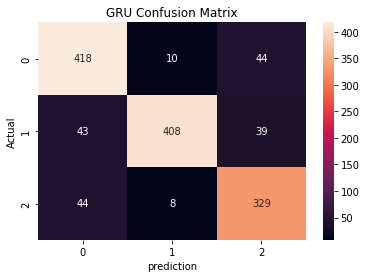

true
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       472
           1       0.96      0.83      0.89       490
           2       0.80      0.86      0.83       381

    accuracy                           0.86      1343
   macro avg       0.86      0.86      0.86      1343
weighted avg       0.87      0.86      0.86      1343



In [48]:
loss,acc=model_gru.evaluate(x_test,y_test_enc)
print("test loss :", loss)
print('test accuracy:',acc*100)
print("____________________________")
loss,acc=model_gru.evaluate(x_train,y_train_enc)
print("trainig loss :", loss)
print('trainig accuracy:',acc*100)
print("____________________________")

pred=model_gru.predict(x_test)
pred_list=[]
for i in pred:
  pred_list.append(np.argmax(i))
cf1 = confusion_matrix(y_test,pred_list)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("GRU"+ ' Confusion Matrix')
plt.show()
print("true")
print(classification_report(y_test,pred_list  ))

# **LSTM**

In [49]:
model_lstm= Sequential()
model_lstm.add(Input(shape=(10,10)))
model_lstm.add(LSTM(120  ,activation='relu'))
model_lstm.add(Dense(3))
model_lstm.add(Activation('softmax'))
model_lstm.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 120)               62880     
                                                                 
 dense_14 (Dense)            (None, 3)                 363       
                                                                 
 activation_2 (Activation)   (None, 3)                 0         
                                                                 
Total params: 63,243
Trainable params: 63,243
Non-trainable params: 0
_________________________________________________________________


In [50]:
model_lstm.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy()
              , metrics=['accuracy'])



In [51]:
model_lstm.fit(x_train,y_train_enc,batch_size=64,epochs=10)

Epoch 1/10
1028/1028 [==============================] - 20s 18ms/step - loss: 0.5605 - accuracy: 0.7864
Epoch 2/10
1028/1028 [==============================] - 21s 21ms/step - loss: 0.4620 - accuracy: 0.8238
Epoch 3/10
1028/1028 [==============================] - 19s 18ms/step - loss: 0.4453 - accuracy: 0.8307
Epoch 4/10
1028/1028 [==============================] - 20s 20ms/step - loss: 0.4354 - accuracy: 0.8342
Epoch 5/10
1028/1028 [==============================] - 19s 18ms/step - loss: 0.4279 - accuracy: 0.8362
Epoch 6/10
1028/1028 [==============================] - 21s 21ms/step - loss: 0.4216 - accuracy: 0.8392
Epoch 7/10
1028/1028 [==============================] - 19s 18ms/step - loss: 0.4167 - accuracy: 0.8401
Epoch 8/10
1028/1028 [==============================] - 20s 19ms/step - loss: 0.4117 - accuracy: 0.8427
Epoch 9/10
1028/1028 [==============================] - 18s 18ms/step - loss: 0.4075 - accuracy: 0.8439
Epoch 10/10
1028/1028 [==============================] - 22s 21m

42/42 [==============================] - 0s 5ms/step - loss: 0.3988 - accuracy: 0.8488
test loss : 0.3987911343574524
test accuracy: 84.88458395004272
____________________________
2056/2056 [==============================] - 12s 6ms/step - loss: 0.3941 - accuracy: 0.8480
trainig loss : 0.3941444158554077
trainig accuracy: 84.80435609817505
____________________________
42/42 [==============================] - 0s 5ms/step


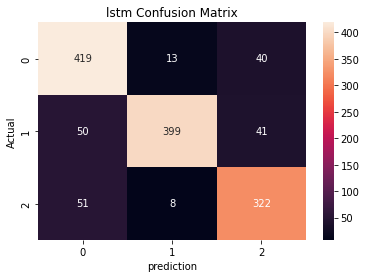

true
              precision    recall  f1-score   support

           0       0.81      0.89      0.84       472
           1       0.95      0.81      0.88       490
           2       0.80      0.85      0.82       381

    accuracy                           0.85      1343
   macro avg       0.85      0.85      0.85      1343
weighted avg       0.86      0.85      0.85      1343



In [52]:
loss,acc=model_lstm.evaluate(x_test,y_test_enc)
print("test loss :", loss)
print('test accuracy:',acc*100)
print("____________________________")
loss,acc=model_lstm.evaluate(x_train,y_train_enc)
print("trainig loss :", loss)
print('trainig accuracy:',acc*100)
print("____________________________")

pred=model_lstm.predict(x_test)
pred_list=[]
for i in pred:
  pred_list.append(np.argmax(i))
cf1 = confusion_matrix(y_test,pred_list)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("lstm"+ ' Confusion Matrix')
plt.show()
print("true")
print(classification_report(y_test,pred_list  ))

RNN model

In [53]:
model_RNN= Sequential()
model_RNN.add(Input(shape=(10,10)))
model_RNN.add(LSTM(120  ,activation='relu'))
model_RNN.add(Dense(3))
model_RNN.add(Activation('softmax'))
model_RNN.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 120)               62880     
                                                                 
 dense_15 (Dense)            (None, 3)                 363       
                                                                 
 activation_3 (Activation)   (None, 3)                 0         
                                                                 
Total params: 63,243
Trainable params: 63,243
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_RNN.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.CategoricalCrossentropy()
              , metrics=['accuracy'])

In [55]:
model_RNN.fit(x_train,y_train_enc,batch_size=64,epochs=10)

Epoch 1/10
1028/1028 [==============================] - 22s 20ms/step - loss: 0.5563 - accuracy: 0.7893
Epoch 2/10
1028/1028 [==============================] - 18s 18ms/step - loss: 0.4574 - accuracy: 0.8253
Epoch 3/10
1028/1028 [==============================] - 21s 21ms/step - loss: 0.4442 - accuracy: 0.8297
Epoch 4/10
1028/1028 [==============================] - 18s 18ms/step - loss: 0.4348 - accuracy: 0.8330
Epoch 5/10
1028/1028 [==============================] - 20s 20ms/step - loss: 0.4263 - accuracy: 0.8371
Epoch 6/10
1028/1028 [==============================] - 18s 18ms/step - loss: 0.4210 - accuracy: 0.8381
Epoch 7/10
1028/1028 [==============================] - 21s 21ms/step - loss: 0.4172 - accuracy: 0.8392
Epoch 8/10
1028/1028 [==============================] - 19s 19ms/step - loss: 0.4120 - accuracy: 0.8408
Epoch 9/10
1028/1028 [==============================] - 20s 19ms/step - loss: 0.4085 - accuracy: 0.8442
Epoch 10/10
1028/1028 [==============================] - 20s 20m

42/42 [==============================] - 0s 5ms/step - loss: 0.4082 - accuracy: 0.8555
test loss : 0.4082413911819458
test accuracy: 85.5547308921814
____________________________
2056/2056 [==============================] - 14s 7ms/step - loss: 0.3913 - accuracy: 0.8497
trainig loss : 0.3913385272026062
trainig accuracy: 84.96853113174438
____________________________
42/42 [==============================] - 0s 5ms/step


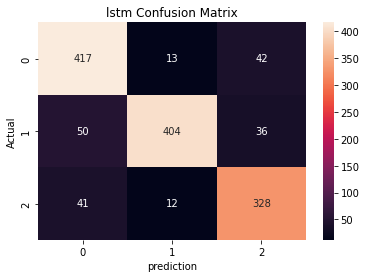

true
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       472
           1       0.94      0.82      0.88       490
           2       0.81      0.86      0.83       381

    accuracy                           0.86      1343
   macro avg       0.86      0.86      0.85      1343
weighted avg       0.86      0.86      0.86      1343



In [57]:
loss,acc=model_RNN.evaluate(x_test,y_test_enc)
print("test loss :", loss)
print('test accuracy:',acc*100)
print("____________________________")
loss,acc=model_RNN.evaluate(x_train,y_train_enc)
print("trainig loss :", loss)
print('trainig accuracy:',acc*100)
print("____________________________")

pred=model_RNN.predict(x_test)
pred_list=[]
for i in pred:
  pred_list.append(np.argmax(i))
cf1 = confusion_matrix(y_test,pred_list)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("lstm"+ ' Confusion Matrix')
plt.show()
print("true")
print(classification_report(y_test,pred_list  ))